In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/shanghai_ranking_2024.csv")
df.head(5)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


In [3]:
df.describe()

,Alumni,Award,Hici,N&S,PUB,PCP
count,1000.000000,1000.00000,1000.000000,989.000000,1000.000000,1000.000000
mean,4.509600,3.78120,10.734400,10.575126,35.113000,19.655300
std,10.103201,11.45538,10.949265,10.637247,13.684495,8.800436
min,0.000000,0.00000,0.000000,0.000000,9.300000,8.600000
25%,0.000000,0.00000,0.000000,3.900000,25.775000,14.100000
50%,0.000000,0.00000,9.200000,7.300000,31.700000,17.600000
75%,0.000000,0.00000,14.600000,13.300000,41.425000,23.000000
max,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


In [4]:
df.isnull().sum
df.dropna(inplace=True)

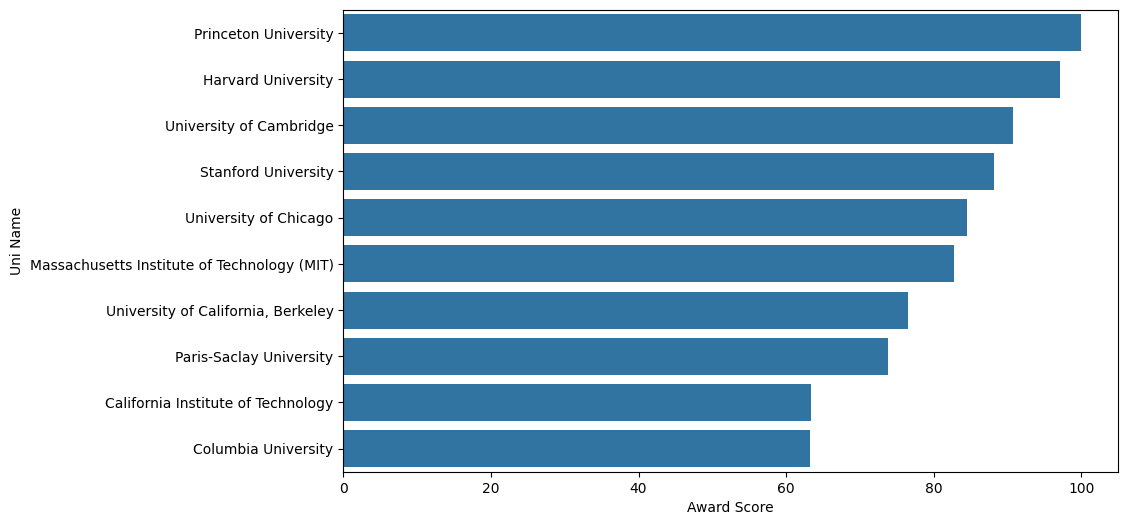

In [5]:
awarduni=df.sort_values(by="Award",ascending=False).head(10)
awarduni=awarduni[['University_Name','Award']]

plt.figure(figsize=(10,6))
sns.barplot(y="University_Name",x='Award',data=awarduni,orient='h')
plt.xlabel('Award Score')
plt.ylabel('Uni Name')
plt.show()

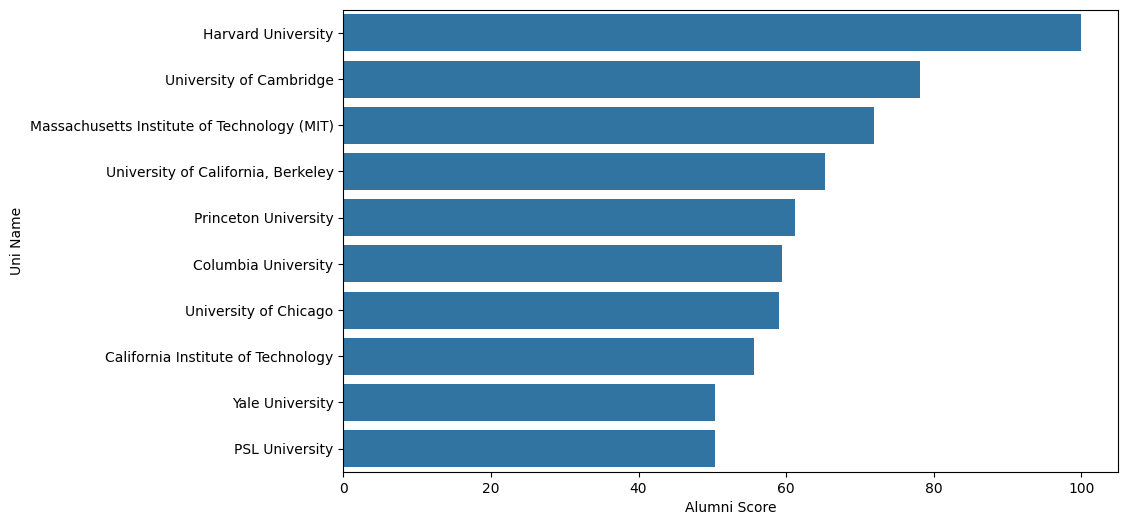

In [6]:
awarduni=df.sort_values(by="Alumni",ascending=False).head(10)
awarduni=awarduni[['University_Name','Alumni']]

plt.figure(figsize=(10,6))
sns.barplot(y="University_Name",x='Alumni',data=awarduni,orient='h')
plt.xlabel('Alumni Score')
plt.ylabel('Uni Name')
plt.show()

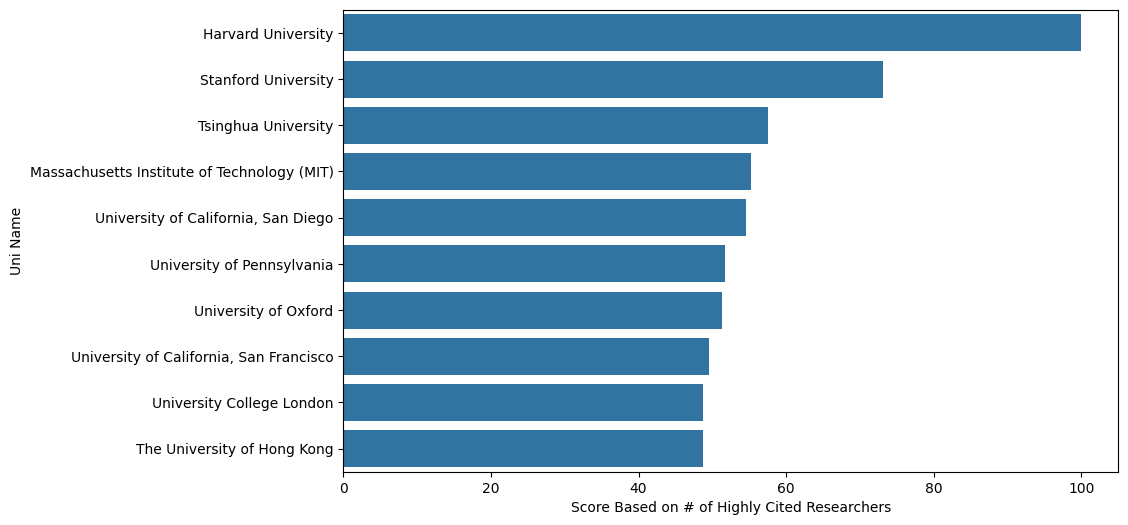

In [7]:
awarduni=df.sort_values(by="Hici",ascending=False).head(10)
awarduni=awarduni[['University_Name','Hici']]

plt.figure(figsize=(10,6))
sns.barplot(y="University_Name",x='Hici',data=awarduni,orient='h')
plt.xlabel('Score Based on # of Highly Cited Researchers')
plt.ylabel('Uni Name')
plt.show()

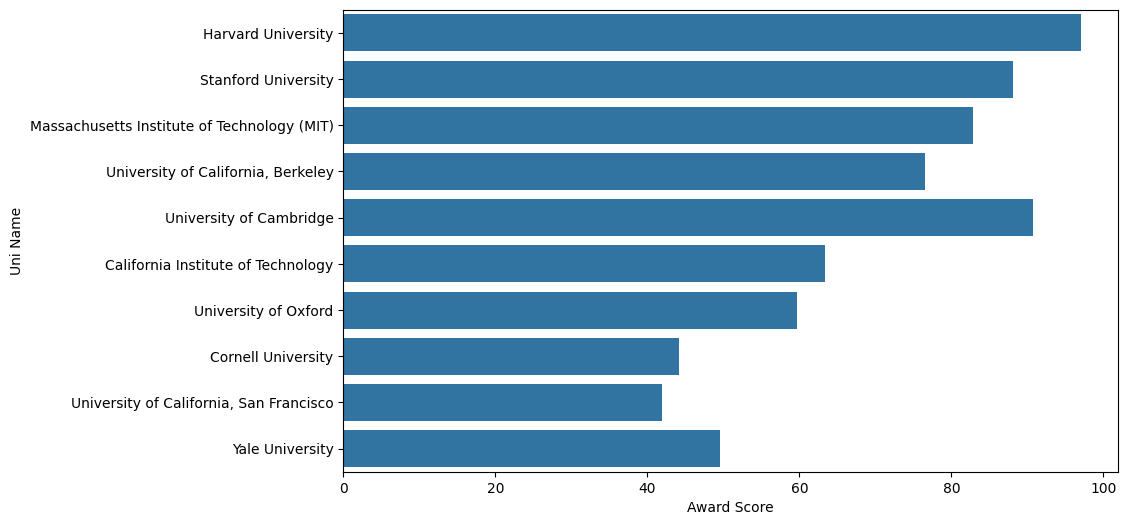

In [8]:
awarduni=df.sort_values(by="N&S",ascending=False).head(10)
awarduni=awarduni[['University_Name','Award']]

plt.figure(figsize=(10,6))
sns.barplot(y="University_Name",x='Award',data=awarduni,orient='h')
plt.xlabel('Award Score')
plt.ylabel('Uni Name')
plt.show()

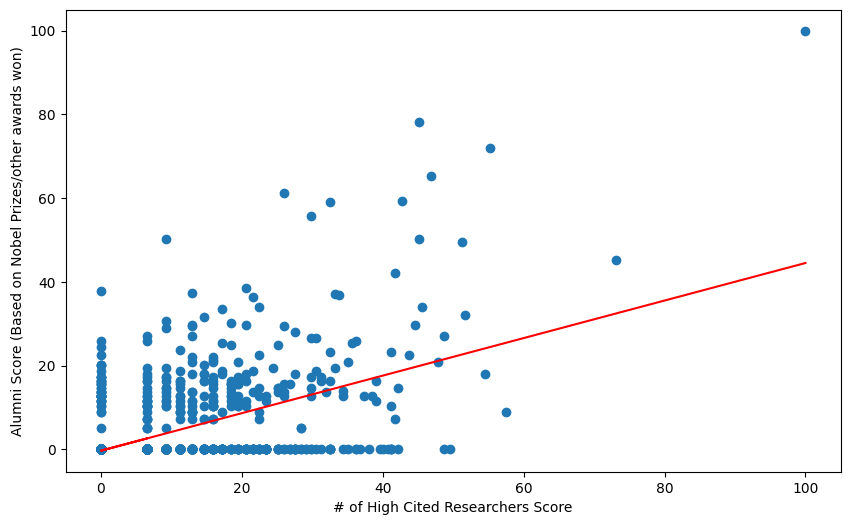

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['Hici'],df['Alumni'])
plt.xlabel('# of High Cited Researchers Score')
plt.ylabel('Alumni Score (Based on Nobel Prizes/other awards won)')
z = np.polyfit(df['Hici'], df['Alumni'], 1)
p = np.poly1d(z)

plt.plot(df['Hici'], p(df['Hici']), color='red', label="Trend line")


plt.show()

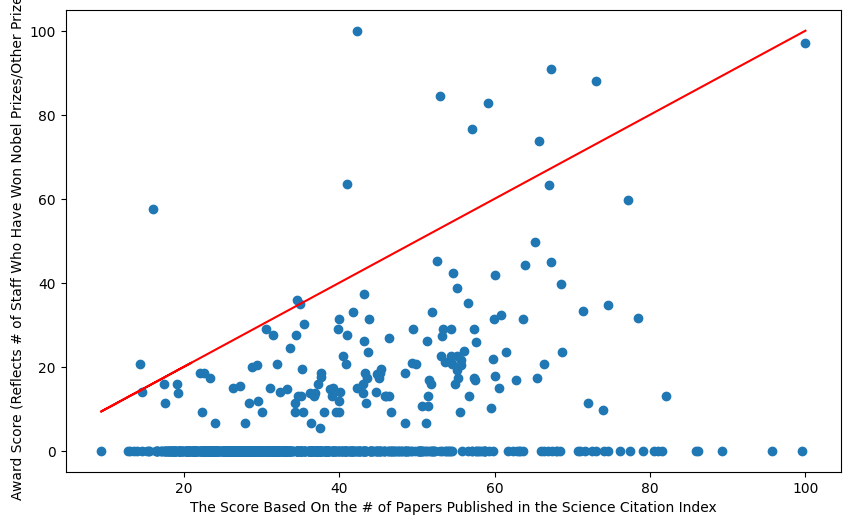

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df['PUB'],df['Award'])
plt.xlabel('The Score Based On the # of Papers Published in the Science Citation Index')
plt.ylabel('Award Score (Reflects # of Staff Who Have Won Nobel Prizes/Other Prizes)')
z = np.polyfit(df['PUB'], df['PUB'], 1)
p = np.poly1d(z)

plt.plot(df['PUB'], p(df['PUB']), color='red', label="Trend line")


plt.show()


Hici is a score based on the number of Highly Cited Researchers.
Alumni Score is based on the number of alumni who have won Nobel/other notable prizes.
Award Score is based on the number of staff at the university who have won Nobel/other notable prizes.
N&S is a score reflecting on the number of research articles published in Nature and Science between 2019 and 2023.
PUB is a score reflecting on the number of papers published by the university in the Science Citation Index.
PCP, or Per Capita Performance Score, is found by dividing the weighted scores of the five indicators mentioned above.


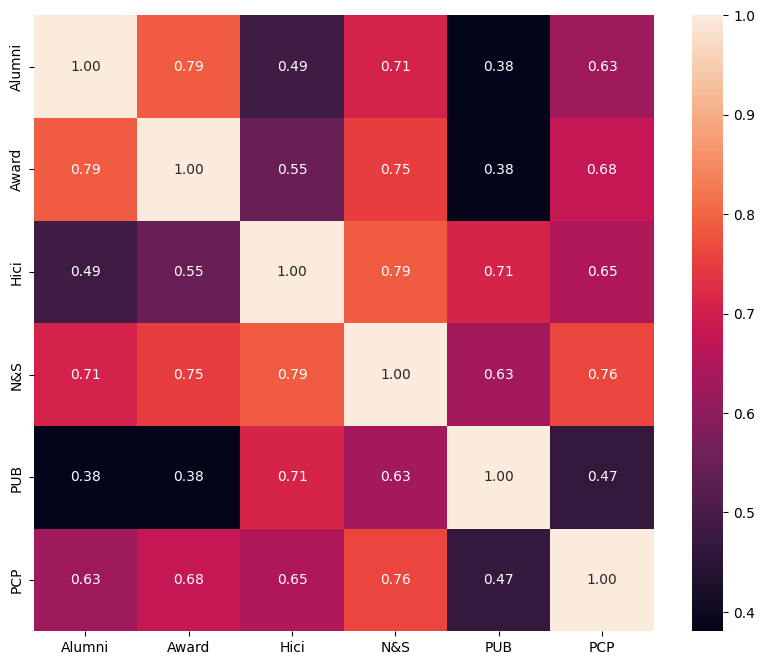

In [11]:
number = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(number.corr(),annot=True, fmt='.2f')

print(f"""
Hici is a score based on the number of Highly Cited Researchers.
Alumni Score is based on the number of alumni who have won Nobel/other notable prizes.
Award Score is based on the number of staff at the university who have won Nobel/other notable prizes.
N&S is a score reflecting on the number of research articles published in Nature and Science between 2019 and 2023.
PUB is a score reflecting on the number of papers published by the university in the Science Citation Index.
PCP, or Per Capita Performance Score, is found by dividing the weighted scores of the five indicators mentioned above.""")